# Project: Data Preprocessing
## Name: BENJAMIN NGUYEN
This Jupyter Notebook Starter File provides a basic outline for your solutions. For detailed instructions, please refer to the assignment on Canvas. Complete all your work for this project in this same Jupyter Notebook file, which you will submit:
- Code:
  - Insert your code where you see #Insert Code Here.
  - Ensure all code is well-commented and easy to understand.
  - Use clear and descriptive variable names.
- Questions:
  - Provide your answers to the guided questions in the same markdown cell as the questions.
  - Demonstrate a deep understanding of the concepts through thorough explanations and critical thinking.

In [ ]:
#Example of supress warnings for Numpy version out of range (optional)
import warnings
warnings.filterwarnings("ignore", category=Warning)

#Some recommended libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

#Some recommended libraries for the text processing tasks
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Part 1: Structured Data

## Step 1: Setup and Instructions
1. Load the `flights-small.csv` dataset using Pandas into a dataframe (Step 1)
2. Print the dataframe's first few elements using the `.head()` command to see what data you have (Also Step 1)
3. Complete the remaining tasks outlined in Canvas (Steps 2-8)
4. Answer the questions

In [20]:
#Insert Code Here

# Load the dataset
df = pd.read_csv("flights-small.csv")

# Display the first few rows
df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013.0,1.0,1.0,517.0,515.0,2.0,830.0,819.0,11.0,...,1545,N14228,EWR,IAH,227.0,1400.0,5.0,15,1/1/13 5:00,United Air Lines Inc.
1,1,2013.0,1.0,1.0,533.0,529.0,4.0,850.0,830.0,20.0,...,1714,N24211,LGA,IAH,227.0,1416.0,5.0,29,1/1/13 5:00,United Air Lines Inc.
2,2,2013.0,1.0,1.0,542.0,540.0,2.0,923.0,850.0,33.0,...,1141,N619AA,JFK,MIA,160.0,1089.0,5.0,40,1/1/13 5:00,American Airlines Inc.
3,3,2013.0,1.0,1.0,544.0,545.0,-1.0,1004.0,1022.0,-18.0,...,725,N804JB,JFK,BQN,183.0,1576.0,5.0,45,1/1/13 5:00,JetBlue Airways
4,4,2013.0,1.0,1.0,554.0,600.0,-6.0,812.0,837.0,-25.0,...,461,N668DN,LGA,ATL,116.0,762.0,6.0,0,1/1/13 6:00,Delta Air Lines Inc.


In [3]:
df

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013.0,1.0,1.0,517.0,515.0,2.0,830.0,819.0,11.0,...,1545,N14228,EWR,IAH,227.0,1400.0,5.0,15,1/1/13 5:00,United Air Lines Inc.
1,1,2013.0,1.0,1.0,533.0,529.0,4.0,850.0,830.0,20.0,...,1714,N24211,LGA,IAH,227.0,1416.0,5.0,29,1/1/13 5:00,United Air Lines Inc.
2,2,2013.0,1.0,1.0,542.0,540.0,2.0,923.0,850.0,33.0,...,1141,N619AA,JFK,MIA,160.0,1089.0,5.0,40,1/1/13 5:00,American Airlines Inc.
3,3,2013.0,1.0,1.0,544.0,545.0,-1.0,1004.0,1022.0,-18.0,...,725,N804JB,JFK,BQN,183.0,1576.0,5.0,45,1/1/13 5:00,JetBlue Airways
4,4,2013.0,1.0,1.0,554.0,600.0,-6.0,812.0,837.0,-25.0,...,461,N668DN,LGA,ATL,116.0,762.0,6.0,0,1/1/13 6:00,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,1133,2013.0,1.0,2.0,1024.0,1025.0,-1.0,1118.0,1129.0,-11.0,...,1026,N621JB,JFK,BOS,35.0,187.0,10.0,25,1/2/13 10:00,JetBlue Airways
1134,1134,2013.0,1.0,2.0,1025.0,1015.0,10.0,1223.0,1229.0,-6.0,...,2319,N900DE,LGA,MSP,157.0,1020.0,10.0,15,1/2/13 10:00,Delta Air Lines Inc.
1135,1135,2013.0,1.0,2.0,1025.0,1030.0,-5.0,1219.0,1215.0,4.0,...,4471,N739MQ,LGA,RDU,90.0,431.0,10.0,30,1/2/13 10:00,Envoy Air
1136,1136,2013.0,1.0,2.0,1027.0,1026.0,1.0,1328.0,1339.0,-11.0,...,1563,N14704,LGA,IAH,219.0,1416.0,10.0,26,1/2/13 10:00,United Air Lines Inc.


## Step 2: Descriptive Statistics: Generate basic and advanced descriptive statistics.

In [4]:
# --- Step 2: Descriptive Statistics ---

# Drop 'id' column if it exists
if "id" in df.columns:
    df = df.drop(columns=["id"])

# --- Basic Descriptive Statistics ---
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Summary Statistics ---")
print(df.describe(include="all"))

# --- Advanced Descriptive Statistics (numerical only) ---
numerical_cols = df.select_dtypes(include=np.number).columns

print("\n--- Skewness ---")
print(df[numerical_cols].skew())

print("\n--- Kurtosis ---")
print(df[numerical_cols].kurtosis())

# --- Correlation Matrix ---
print("\n--- Correlation Matrix ---")
print(df[numerical_cols].corr())





--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            1136 non-null   float64
 1   month           1136 non-null   float64
 2   day             1137 non-null   float64
 3   dep_time        1133 non-null   float64
 4   sched_dep_time  1137 non-null   float64
 5   dep_delay       1128 non-null   float64
 6   arr_time        1124 non-null   float64
 7   sched_arr_time  1126 non-null   float64
 8   arr_delay       1122 non-null   float64
 9   carrier         1135 non-null   object 
 10  flight          1138 non-null   int64  
 11  tailnum         1136 non-null   object 
 12  origin          1138 non-null   object 
 13  dest            1137 non-null   object 
 14  air_time        1124 non-null   float64
 15  distance        1136 non-null   float64
 16  hour            1137 non-null   float64
 17  minute     

## Step 3: Exploratory Data Visualization: Visualize data distributions and relationships.


In [5]:
df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,2013.0,1.0,1.0,517.0,515.0,2.0,830.0,819.0,11.0,UA,1545,N14228,EWR,IAH,227.0,1400.0,5.0,15,1/1/13 5:00,United Air Lines Inc.
1,2013.0,1.0,1.0,533.0,529.0,4.0,850.0,830.0,20.0,UA,1714,N24211,LGA,IAH,227.0,1416.0,5.0,29,1/1/13 5:00,United Air Lines Inc.
2,2013.0,1.0,1.0,542.0,540.0,2.0,923.0,850.0,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089.0,5.0,40,1/1/13 5:00,American Airlines Inc.
3,2013.0,1.0,1.0,544.0,545.0,-1.0,1004.0,1022.0,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576.0,5.0,45,1/1/13 5:00,JetBlue Airways
4,2013.0,1.0,1.0,554.0,600.0,-6.0,812.0,837.0,-25.0,DL,461,N668DN,LGA,ATL,116.0,762.0,6.0,0,1/1/13 6:00,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,2013.0,1.0,2.0,1024.0,1025.0,-1.0,1118.0,1129.0,-11.0,B6,1026,N621JB,JFK,BOS,35.0,187.0,10.0,25,1/2/13 10:00,JetBlue Airways
1134,2013.0,1.0,2.0,1025.0,1015.0,10.0,1223.0,1229.0,-6.0,DL,2319,N900DE,LGA,MSP,157.0,1020.0,10.0,15,1/2/13 10:00,Delta Air Lines Inc.
1135,2013.0,1.0,2.0,1025.0,1030.0,-5.0,1219.0,1215.0,4.0,MQ,4471,N739MQ,LGA,RDU,90.0,431.0,10.0,30,1/2/13 10:00,Envoy Air
1136,2013.0,1.0,2.0,1027.0,1026.0,1.0,1328.0,1339.0,-11.0,UA,1563,N14704,LGA,IAH,219.0,1416.0,10.0,26,1/2/13 10:00,United Air Lines Inc.


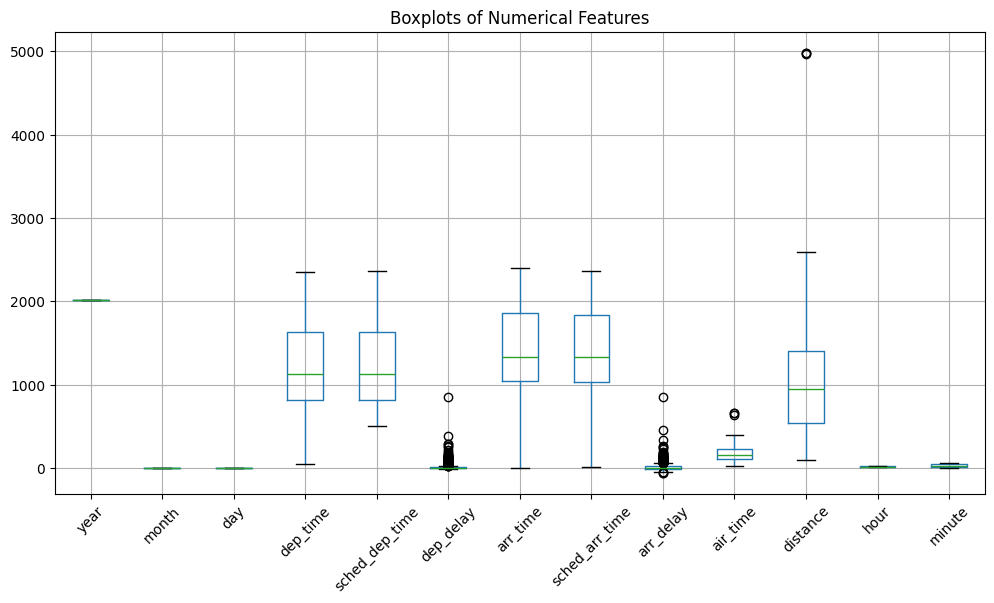

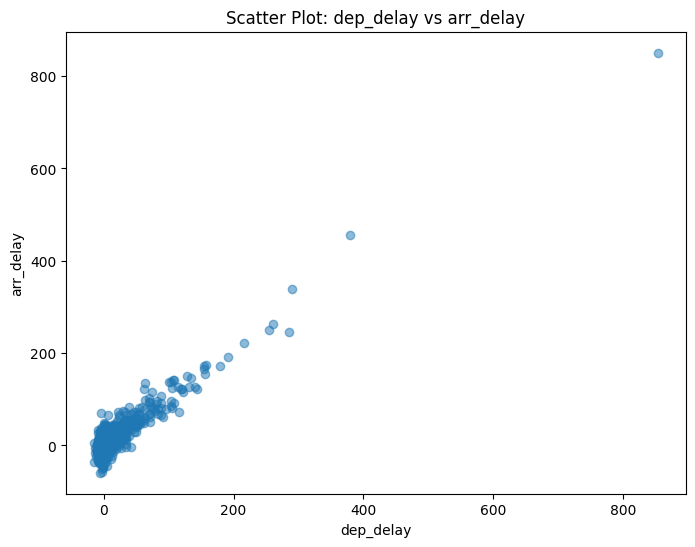

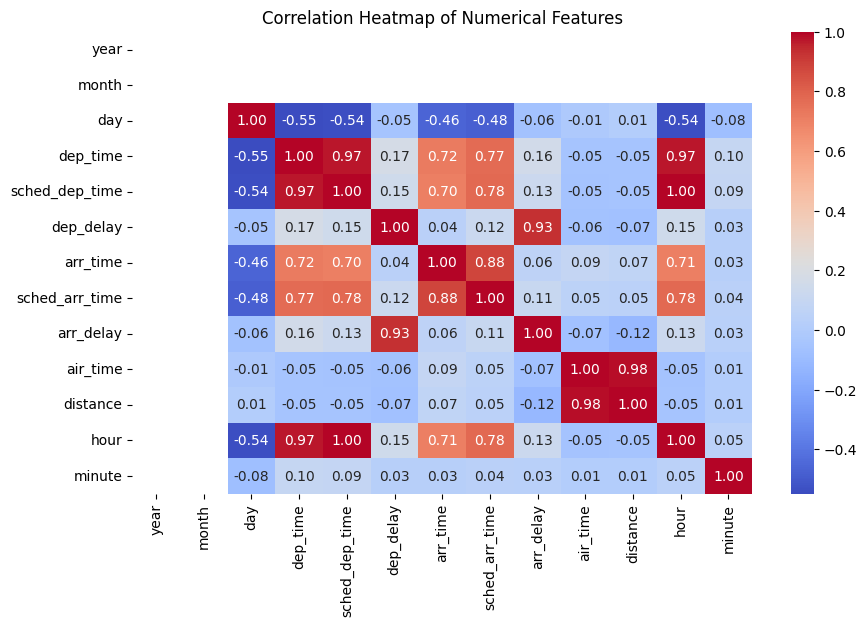

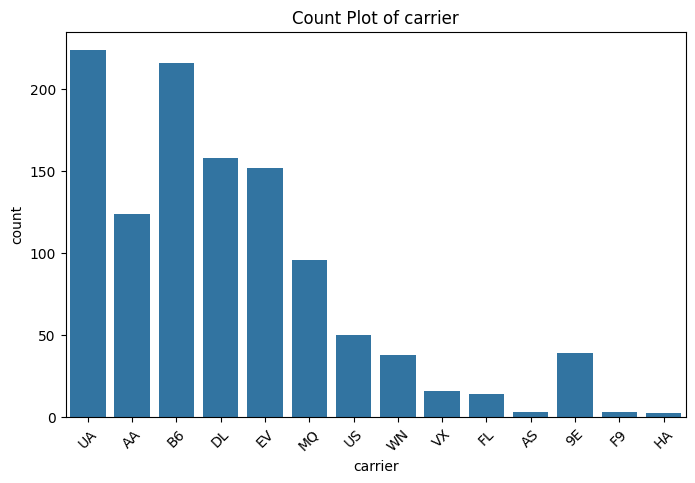

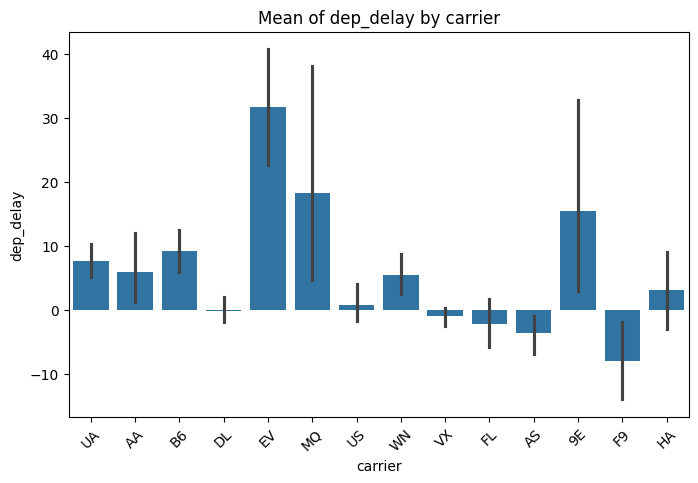

In [6]:
# Identify numeric and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()

# Move 'flight' to categorical if it exists
if "flight" in numerical_cols:
    numerical_cols.remove("flight")
    categorical_cols.append("flight")



# 1. Visualize Distributions
plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot()
plt.title("Boxplots of Numerical Features")
plt.xticks(rotation=45)
plt.show()

# 2. Visualize Relationships
if len(numerical_cols) >= 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[numerical_cols[5]], df[numerical_cols[8]], alpha=0.5)
    plt.xlabel(numerical_cols[5])
    plt.ylabel(numerical_cols[8])
    plt.title(f"Scatter Plot: {numerical_cols[5]} vs {numerical_cols[8]}")
    plt.show()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# # 3. Visualize Categorical Features
plt.figure(figsize=(8, 5))
sns.countplot(x=categorical_cols[0], data=df)
plt.title(f"Count Plot of {categorical_cols[0]}")
plt.xticks(rotation=45)
plt.show()

if len(numerical_cols) > 0 and len(categorical_cols) > 0:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=categorical_cols[0], y=numerical_cols[5], data=df, estimator=np.mean)
    plt.title(f"Mean of {numerical_cols[5]} by {categorical_cols[0]}")
    plt.xticks(rotation=45)
    plt.show()


## Step 4: Data Cleansing: Handle missing values and outliers.

In [7]:
df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,2013.0,1.0,1.0,517.0,515.0,2.0,830.0,819.0,11.0,UA,1545,N14228,EWR,IAH,227.0,1400.0,5.0,15,1/1/13 5:00,United Air Lines Inc.
1,2013.0,1.0,1.0,533.0,529.0,4.0,850.0,830.0,20.0,UA,1714,N24211,LGA,IAH,227.0,1416.0,5.0,29,1/1/13 5:00,United Air Lines Inc.
2,2013.0,1.0,1.0,542.0,540.0,2.0,923.0,850.0,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089.0,5.0,40,1/1/13 5:00,American Airlines Inc.
3,2013.0,1.0,1.0,544.0,545.0,-1.0,1004.0,1022.0,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576.0,5.0,45,1/1/13 5:00,JetBlue Airways
4,2013.0,1.0,1.0,554.0,600.0,-6.0,812.0,837.0,-25.0,DL,461,N668DN,LGA,ATL,116.0,762.0,6.0,0,1/1/13 6:00,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,2013.0,1.0,2.0,1024.0,1025.0,-1.0,1118.0,1129.0,-11.0,B6,1026,N621JB,JFK,BOS,35.0,187.0,10.0,25,1/2/13 10:00,JetBlue Airways
1134,2013.0,1.0,2.0,1025.0,1015.0,10.0,1223.0,1229.0,-6.0,DL,2319,N900DE,LGA,MSP,157.0,1020.0,10.0,15,1/2/13 10:00,Delta Air Lines Inc.
1135,2013.0,1.0,2.0,1025.0,1030.0,-5.0,1219.0,1215.0,4.0,MQ,4471,N739MQ,LGA,RDU,90.0,431.0,10.0,30,1/2/13 10:00,Envoy Air
1136,2013.0,1.0,2.0,1027.0,1026.0,1.0,1328.0,1339.0,-11.0,UA,1563,N14704,LGA,IAH,219.0,1416.0,10.0,26,1/2/13 10:00,United Air Lines Inc.


In [8]:

df_clean = df.copy()
if "id" in df_clean.columns:
    df_clean = df_clean.drop(columns=["id"])

numerical_columns = [
    'year', 'month', 'day', 'dep_time', 'sched_dep_time',
    'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay',
    'flight', 'air_time', 'distance', 'hour', 'minute'
]
non_numerical_columns = [
    'carrier', 'tailnum', 'origin', 'dest', 'time_hour', 'name'
]

for c in numerical_columns:
    df_clean[c] = pd.to_numeric(df_clean[c], errors="coerce")
if "time_hour" in non_numerical_columns:
    df_clean["time_hour"] = pd.to_datetime(df_clean["time_hour"], errors="coerce")

print("\nMissing values:")
print(df_clean[numerical_columns + non_numerical_columns].isna().sum().sort_values(ascending=False))

#    - numerical: median
#    - categorical: mode
for c in numerical_columns:
    med = df_clean[c].median()
    df_clean[c] = df_clean[c].fillna(med)

for c in non_numerical_columns:
    if df_clean[c].isna().any():
        mode_val = df_clean[c].mode(dropna=True)
        if not mode_val.empty:
            df_clean[c] = df_clean[c].fillna(mode_val.iloc[0])

before_rows = len(df_clean)
mask = pd.Series(True, index=df_clean.index)
for c in numerical_columns:
    q1 = df_clean[c].quantile(0.25)
    q3 = df_clean[c].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    mask &= df_clean[c].between(lower, upper) | df_clean[c].isna()  
df_clean = df_clean[mask].reset_index(drop=True)
after_rows = len(df_clean)

print(f"\n--- Outlier removal via IQR ---")
print(f"Rows before: {before_rows} | Rows after: {after_rows} | Removed: {before_rows - after_rows}")



Missing values:
arr_delay         16
arr_time          14
air_time          14
sched_arr_time    12
dep_delay         10
dep_time           5
carrier            3
year               2
tailnum            2
month              2
distance           2
day                1
hour               1
sched_dep_time     1
dest               1
flight             0
minute             0
origin             0
time_hour          0
name               0
dtype: int64

--- Outlier removal via IQR ---
Rows before: 1138 | Rows after: 980 | Removed: 158


In [9]:
df_clean

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,2013.0,1.0,1.0,517.0,515.0,2.0,830.0,819.0,11.0,UA,1545,N14228,EWR,IAH,227.0,1400.0,5.0,15,2013-01-01 05:00:00,United Air Lines Inc.
1,2013.0,1.0,1.0,533.0,529.0,4.0,850.0,830.0,20.0,UA,1714,N24211,LGA,IAH,227.0,1416.0,5.0,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2013.0,1.0,1.0,542.0,540.0,2.0,923.0,850.0,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089.0,5.0,40,2013-01-01 05:00:00,American Airlines Inc.
3,2013.0,1.0,1.0,544.0,545.0,-1.0,1004.0,1022.0,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576.0,5.0,45,2013-01-01 05:00:00,JetBlue Airways
4,2013.0,1.0,1.0,554.0,600.0,-6.0,812.0,837.0,-25.0,DL,461,N668DN,LGA,ATL,116.0,762.0,6.0,0,2013-01-01 06:00:00,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,2013.0,1.0,2.0,1024.0,1025.0,-1.0,1118.0,1129.0,-11.0,B6,1026,N621JB,JFK,BOS,35.0,187.0,10.0,25,2013-01-02 10:00:00,JetBlue Airways
976,2013.0,1.0,2.0,1025.0,1015.0,10.0,1223.0,1229.0,-6.0,DL,2319,N900DE,LGA,MSP,157.0,1020.0,10.0,15,2013-01-02 10:00:00,Delta Air Lines Inc.
977,2013.0,1.0,2.0,1025.0,1030.0,-5.0,1219.0,1215.0,4.0,MQ,4471,N739MQ,LGA,RDU,90.0,431.0,10.0,30,2013-01-02 10:00:00,Envoy Air
978,2013.0,1.0,2.0,1027.0,1026.0,1.0,1328.0,1339.0,-11.0,UA,1563,N14704,LGA,IAH,219.0,1416.0,10.0,26,2013-01-02 10:00:00,United Air Lines Inc.


## Step 5: Data Transformation: Normalize, standardize, and encode features.

In [10]:

# Start from the cleaned dataframe if it exists, otherwise from df
df_t = df_clean.copy() if "df_clean" in globals() else df.copy()

# Columns to use (keep only those that actually exist)
numerical_columns = [
    'year', 'month', 'day', 'dep_time', 'sched_dep_time',
    'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay',
    'flight', 'air_time', 'distance', 'hour', 'minute'
]
non_numerical_columns = [
    'carrier', 'tailnum', 'origin', 'dest', 'time_hour', 'name'
]
numerical_columns    = [c for c in numerical_columns if c in df_t.columns]
non_numerical_columns = [c for c in non_numerical_columns if c in df_t.columns]

#    Log transforms (skewed features). For delays (can be negative), use signed log1p.
log_pos_cols = [c for c in ['air_time', 'distance'] if c in df_t.columns]
for c in log_pos_cols:
    df_t[f'log1p_{c}'] = np.log1p(df_t[c].clip(lower=0))

log_signed_cols = [c for c in ['dep_delay', 'arr_delay'] if c in df_t.columns]
for c in log_signed_cols:
    df_t[f'log1p_{c}_signed'] = np.sign(df_t[c]) * np.log1p(np.abs(df_t[c]))

# Encode categoricals
#    Nominal: one-hot encode; Ordinal (or high-cardinality id-like): label encode
nominal_cols = [c for c in ['carrier', 'origin', 'dest', 'name'] if c in df_t.columns]
label_cols   = [c for c in ['tailnum'] if c in df_t.columns]   # id-like → label encode

onehot_df = pd.get_dummies(df_t[nominal_cols], drop_first=False, dtype=int) if nominal_cols else pd.DataFrame(index=df_t.index)

label_encoders = {}
for c in label_cols:
    le = LabelEncoder()
    df_t[f"{c}_le"] = le.fit_transform(df_t[c].astype(str))
    label_encoders[c] = le  # keep to transform future data

le_cols = [f"{c}_le" for c in label_cols if f"{c}_le" in df_t.columns]

# Scale numerical features (choose one method)
method = "standard"  # change to "minmax" if you prefer MinMax scaling
scaler = StandardScaler() if method == "standard" else MinMaxScaler()

X_num = scaler.fit_transform(df_t[numerical_columns]) if numerical_columns else np.empty((len(df_t), 0))
num_prefix = "z_" if method == "standard" else "mm_"
num_scaled = pd.DataFrame(X_num, columns=[f"{num_prefix}{c}" for c in numerical_columns], index=df_t.index)

#  Assemble final transformed dataset
log_feats = [c for c in df_t.columns if c.startswith("log1p_")]
parts = [num_scaled]
if log_feats:
    parts.append(df_t[log_feats])
if not onehot_df.empty:
    parts.append(onehot_df)
if le_cols:
    parts.append(df_t[le_cols])

df_transformed = pd.concat(parts, axis=1)

print("Transformed shape:", df_transformed.shape)
df_transformed.head()


Transformed shape: (980, 130)


,z_year,z_month,z_day,z_dep_time,z_sched_dep_time,z_dep_delay,z_arr_time,z_sched_arr_time,z_arr_delay,z_flight,...,name_Endeavor Air Inc.,name_Envoy Air,name_ExpressJet Airlines Inc.,name_Frontier Airlines Inc.,name_JetBlue Airways,name_Southwest Airlines Co.,name_US Airways Inc.,name_United Air Lines Inc.,name_Virgin America,tailnum_le
0,0.0,0.0,-0.602498,-1.403011,-1.418808,0.239408,-1.179024,-1.199400,0.628598,-0.091219,...,0,0,0,0,0,0,0,1,0,40
1,0.0,0.0,-0.602498,-1.369274,-1.389235,0.517064,-1.137722,-1.176692,1.179714,0.018730,...,0,0,0,0,0,0,0,1,0,107
2,0.0,0.0,-0.602498,-1.350296,-1.365998,0.239408,-0.986971,-1.135405,1.975772,-0.354058,...,0,0,0,0,0,0,0,0,0,473
3,0.0,0.0,-0.602498,-1.346079,-1.355436,-0.177077,-0.819699,-0.780336,-1.147222,-0.624703,...,0,0,0,0,1,0,0,0,0,611
4,0.0,0.0,-0.602498,-1.324993,-1.239253,-0.871218,-1.216195,-1.162241,-1.575868,-0.796459,...,0,0,0,0,0,0,0,0,0,521


## Step 6: Dimensionality Reduction: Apply PCA and other techniques to reduce dimensionality.


Components for 95% variance: 89


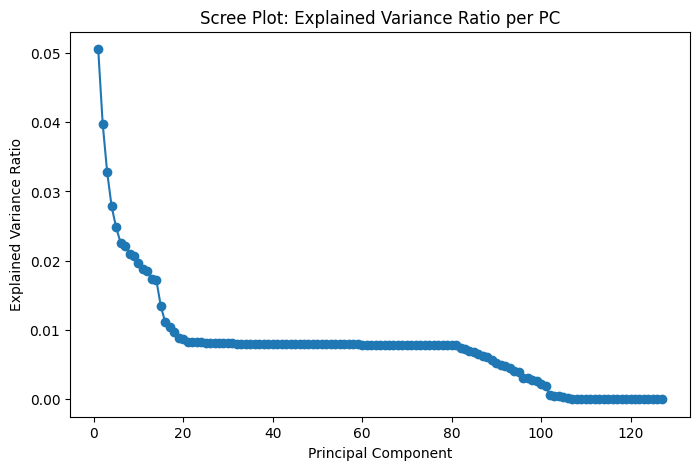

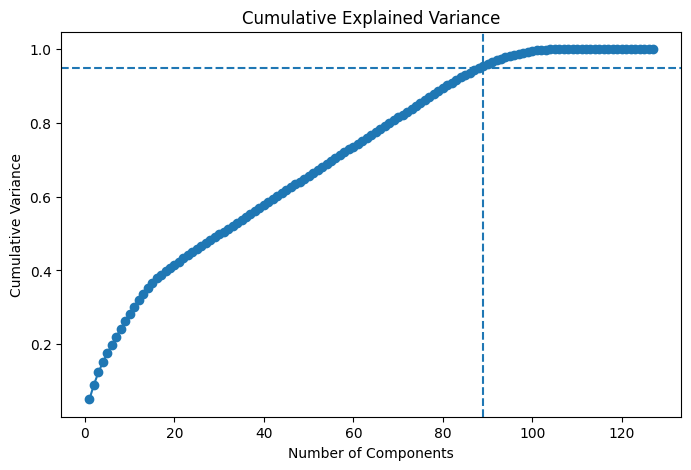

In [11]:

# Start from transformed data
X = df_transformed.copy()

# Drop ID-like label encodings (they're arbitrary numbers)
for c in list(X.columns):
    if c.endswith("_le"):  # e.g., tailnum_le
        X.drop(columns=c, inplace=True, errors="ignore")

# Drop any constant/near-constant columns (can break PCA intuition)
const_cols = [c for c in X.columns if X[c].nunique(dropna=False) <= 1]
if const_cols:
    X.drop(columns=const_cols, inplace=True)

# Standardize ALL columns going into PCA (including one-hot + log features)
scaler_all = StandardScaler()
X_scaled = scaler_all.fit_transform(X)

# PCA
pca_full = PCA()
pca_full.fit(X_scaled)
explained = pca_full.explained_variance_ratio_
cum = np.cumsum(explained)

# Keep components for 95% variance
target = 0.95
k = int(np.argmax(cum >= target) + 1)
print("Components for 95% variance:", k)

pca = PCA(n_components=k)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(k)])

# Plots
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained)+1), explained, marker="o")
plt.title("Scree Plot: Explained Variance Ratio per PC")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum)+1), cum, marker="o")
plt.axhline(y=target, linestyle="--")
plt.axvline(x=k, linestyle="--")
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.show()




## Step 7: Data Aggregation: Perform aggregation.

In [12]:

g = df_clean.copy()

if {"year", "month", "day"}.issubset(g.columns):
    g["date"] = pd.to_datetime(g[["year", "month", "day"]].astype(int), errors="coerce")

# Binary label for on-time vs delayed arrivals (used for rates)
if "arr_delay" in g.columns:
    g["delayed"] = (g["arr_delay"] > 0).astype(int)

# Carrier-level summary
carrier_stats = (
    g.groupby("carrier")
     .agg(
         flights=("carrier", "size"),
         mean_dep_delay=("dep_delay", "mean"),
         mean_arr_delay=("arr_delay", "mean"),
         on_time_rate=("delayed", lambda s: 1 - s.mean() if s.notna().any() else np.nan),
         avg_distance=("distance", "mean")
     )
     .sort_values("flights", ascending=False)
     .reset_index()
)

if {"carrier", "name"}.issubset(g.columns):
    carrier_stats = carrier_stats.merge(
        g[["carrier", "name"]].drop_duplicates(), on="carrier", how="left"
    )

print("\nCarrier summary (head):")
print(carrier_stats.head())

# Route-level summary 
route_stats = (
    g.groupby(["origin", "dest"])
     .agg(
         flights=("flight", "count"),
         mean_arr_delay=("arr_delay", "mean"),
         total_distance=("distance", "sum")
     )
     .reset_index()
     .sort_values("flights", ascending=False)
)

print("\nTop routes by flight count (head):")
print(route_stats.head())

# Daily and monthly summaries
if "date" in g.columns:
    daily = (
        g.groupby("date")
         .agg(
             flights=("flight", "count"),
             mean_dep_delay=("dep_delay", "mean"),
             mean_arr_delay=("arr_delay", "mean")
         )
         .reset_index()
         .sort_values("date")
    )
    print("\nDaily summary (head):")
    print(daily.head())

monthly = (
    g.groupby(["year", "month"])
     .agg(
         flights=("flight", "count"),
         mean_dep_delay=("dep_delay", "mean"),
         mean_arr_delay=("arr_delay", "mean")
     )
     .reset_index()
     .sort_values(["year", "month"])
)
print("\nMonthly summary:")
print(monthly)




Carrier summary (head):
  carrier  flights  mean_dep_delay  mean_arr_delay  on_time_rate  \
0      UA      202        2.435644        1.158416      0.490099   
1      UA      202        2.435644        1.158416      0.490099   
2      UA      202        2.435644        1.158416      0.490099   
3      UA      202        2.435644        1.158416      0.490099   
4      B6      188        1.372340        0.489362      0.526596   

   avg_distance                    name  
0   1511.188119   United Air Lines Inc.  
1   1511.188119               Envoy Air  
2   1511.188119  American Airlines Inc.  
3   1511.188119    Delta Air Lines Inc.  
4   1049.292553         JetBlue Airways  

Top routes by flight count (head):
    origin dest  flights  mean_arr_delay  total_distance
124    LGA  ATL       37        4.108108         28194.0
94     JFK  LAX       35        0.428571         86625.0
150    LGA  ORD       32        1.375000         23743.0
115    JFK  SFO       27       -9.666667         6

## Step 8: Data Splitting (Train, Test, Validate): Split the dataset for training, testing, and validation.


In [13]:

# CONFIG
y_col = "arr_delay"       
classification_mode = False  # True if y is a class label; False for regression

base = df_clean.copy() if "df_clean" in globals() else df.copy()
base = base.drop(columns=["id"], errors="ignore")

# Build y (target)
if y_col not in base.columns:
    raise ValueError(f"Target column '{y_col}' not found in dataframe.")
y = base[y_col].copy()
if classification_mode:
    # fill with mode for classification
    if y.isna().any():
        y = y.fillna(y.mode(dropna=True).iloc[0])
    y = y.astype(int)
else:
    # fill with median for regression
    y = pd.to_numeric(y, errors="coerce").fillna(y.median())

# X (features)
if "df_pca" in globals():
    X = df_pca.copy()
elif "df_transformed" in globals():
    X = df_transformed.copy()
else:
    # Fallback: numeric + one-hot, then scale numeric
    feats = base.drop(columns=[y_col], errors="ignore")
    X = pd.get_dummies(feats, drop_first=False, dtype=int)
    num_cols = X.select_dtypes(include=np.number).columns
    if len(num_cols) > 0:
        scaler_tmp = StandardScaler()
        X[num_cols] = scaler_tmp.fit_transform(X[num_cols])

# Align indices
idx = X.index.intersection(y.index)
X = X.loc[idx]
y = y.loc[idx]


if classification_mode:
    strat = y
else:
    strat = pd.qcut(y, q=10, duplicates="drop")

# Split: 70% train, 10% val, 20% test
X_train, X_temp, y_train, y_temp, strat_train, strat_temp = train_test_split(
    X, y, strat, test_size=0.30, random_state=42, stratify=strat
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=2/3, random_state=42, stratify=strat_temp
)

n = len(X)
print(f"Total: {n}")
print(f"Train: {len(X_train)} ({len(X_train)/n:.1%})")
print(f"Val:   {len(X_val)} ({len(X_val)/n:.1%})")
print(f"Test:  {len(X_test)} ({len(X_test)/n:.1%})")

if classification_mode:
    def show_dist(label, y_series):
        print(f"{label} class distribution:\n",
              y_series.value_counts(normalize=True).sort_index().round(3))
else:
    # Reuse the same qcut bins via their edges
    intervals = strat.cat.categories  # IntervalIndex
    edges = np.r_[intervals.left[0], intervals.right.values]

    def show_dist(label, y_series):
        counts = pd.cut(y_series, bins=edges, include_lowest=True)\
                   .value_counts(normalize=True, sort=False).round(3)
        print(f"{label} y-bin distribution (qcut bins):\n", counts)

print()
# show_dist("Overall", y)
show_dist("Train",   y_train)
show_dist("Val",     y_val)
show_dist("Test",    y_test)


Total: 980
Train: 686 (70.0%)
Val:   98 (10.0%)
Test:  196 (20.0%)

Train y-bin distribution (qcut bins):
 arr_delay
(-45.001999999999995, -19.0]    0.103
(-19.0, -13.0]                  0.098
(-13.0, -8.0]                   0.099
(-8.0, -4.0]                    0.124
(-4.0, 0.0]                     0.083
(0.0, 4.0]                      0.114
(4.0, 9.0]                      0.096
(9.0, 14.0]                     0.093
(14.0, 23.0]                    0.102
(23.0, 53.0]                    0.087
Name: proportion, dtype: float64
Val y-bin distribution (qcut bins):
 arr_delay
(-45.001999999999995, -19.0]    0.102
(-19.0, -13.0]                  0.102
(-13.0, -8.0]                   0.102
(-8.0, -4.0]                    0.122
(-4.0, 0.0]                     0.082
(0.0, 4.0]                      0.112
(4.0, 9.0]                      0.092
(9.0, 14.0]                     0.092
(14.0, 23.0]                    0.102
(23.0, 53.0]                    0.092
Name: proportion, dtype: float64
Test y-bin

#### Structured Data Processing Questions
1. Why is it important to perform both descriptive statistics and exploratory data visualization before beginning the data preprocessing steps? Explain how these steps help in understanding the data better.
2. When handling missing values, under what circumstances would you choose to remove rows/columns with missing data versus imputing missing values? Provide a specific example to support your answer.
3. In the provided flight dataset, identify the top three features that you believe would have the most significant impact on predicting flight delays. Justify your selection based on exploratory data analysis.
4. Describe a scenario where feature engineering could improve the performance of a model trained on the flight dataset. Propose at least two new features that could be engineered and explain why they might be beneficial.
5. What was the impact of PCA, normalization and dummies, were these useful applications in this code, would you do them again?


1. Descriptive statistics tell you what the data are: types, valid ranges, missingness, distribution shape, and obvious outliers. Exploratory plots show how the data behave: relationships, nonlinear patterns, and group differences that tables hide. On your flights data, these steps immediately surfaced that the id column is non-informative and should be dropped. The flight was in the numerical fomat, but actually, it is not. So we need to convert it into categorical format. The departure delay strongly tracks arrival delay as seen in the correlation plot, and that delay levels change with context such as hour and carrier. With that evidence in hand, you can choose appropriate imputations, transformations, and encodings, and focus modeling on the variables that actually drive signal rather than guessing.


2. Removing data is appropriate when a column is mostly empty or adds little predictive value, or when only a few rows are corrupted and discarding them will not affect the distribution. Imputation is preferred when the feature is important and the amount of missingness is small enough that filling values preserves useful information. For example, in the flights dataset, missing departure delay values were filled with the median makes sense because delays are skewed and the feature is critical for predicting arrival delay.

3. Based on the Correlation Heatmap: The first key feature is departure delay, which showed the strongest numeric signal with correlation around 0.93 to arrival delay. Then the departure time (0.17) and hour (0.15).

4. A useful scenario is predicting whether a flight will arrive late before it departs. Raw variables like hour and route are helpful, but engineered features can capture patterns that are not linear. One improvement would be to create part-of-day categories from the departure hour (early morning, morning, afternoon, evening). This reflects the nonlinear congestion pattern you observed, where midday flights tend to have worse delays. Another improvement would be a route congestion score, defined as the historical average departure delay for each origin–destination–hour combination. This encodes systematic differences across airports and times, helping the model adjust for routes or schedules that are prone to delays
6. One-hot encoding was clearly useful, since categorical fields like carrier, origin, and destination cannot be used directly in most models and showed meaningful variation in delay behavior. Normalization was also important, especially before PCA, because it put features on a common scale and prevented those with larger numeric ranges from dominating the analysis. PCA itself gave a smoother feature space and reduced collinearity, but it required nearly ninety components to retain about ninety-five percent of the variance, which limits interpretability and may not boost performance for tree-based models. I would definitely apply one-hot encoding and normalization again, and use PCA selectively—mainly for linear or distance-based models, or when dimensionality reduction is necessary.

# Part 2: Unstructured Data

## Instructions
1. Use the provided code and sample data as a starting place
2. Run the code and print out the `reviews` list to ensure you are ready to clean and preprocess the text data
3. Complete the remaining tasks outlined in Canvas 
4. Answer the questions

In [15]:
## PROVIDED CODE BEGIN
# Ensure NLTK resources are downloaded, comment out if needed after run once
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download("punkt_tab")   # new requirement in recent NLTK


# Sample text data
reviews = [
    "This movie was fantastic! The plot was engaging and the characters were well-developed.",
    "I did not enjoy this movie. The storyline was boring and the acting was subpar.",
    "An average film with some good moments. Not the best, but worth watching."
]

def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens

# Preprocess all reviews
preprocessed_reviews = [' '.join(preprocess_text(review)) for review in reviews]
## PROVIDED CODE END

#Insert Code Here


In [19]:
# Apply TF-IDF to the cleaned reviews
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_reviews)

# Convert to DataFrame for easier viewing
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print("Preprocessed Reviews:")
print(preprocessed_reviews)
print("\nTF-IDF Feature Matrix:")
tfidf_df

Preprocessed Reviews:
['movie fantastic plot engaging characters welldeveloped', 'enjoy movie storyline boring acting subpar', 'average film good moments best worth watching']

TF-IDF Feature Matrix:


,acting,average,best,boring,characters,engaging,enjoy,fantastic,film,good,moments,movie,plot,storyline,subpar,watching,welldeveloped,worth
0,0.000000,0.000000,0.000000,0.000000,0.423394,0.423394,0.000000,0.423394,0.000000,0.000000,0.000000,0.322002,0.423394,0.000000,0.000000,0.000000,0.423394,0.000000
1,0.423394,0.000000,0.000000,0.423394,0.000000,0.000000,0.423394,0.000000,0.000000,0.000000,0.000000,0.322002,0.000000,0.423394,0.423394,0.000000,0.000000,0.000000
2,0.000000,0.377964,0.377964,0.000000,0.000000,0.000000,0.000000,0.000000,0.377964,0.377964,0.377964,0.000000,0.000000,0.000000,0.000000,0.377964,0.000000,0.377964


#### Unstructured Data Processing Questions
1. Why do you think it is important that we apply some transformations to our data like removing punctuation and making our text lowercase?
2. If we did not do this, what would happen?


1. Applying transformations like removing punctuation and converting text to lowercase makes the data more consistent. Without them, the model would treat “Movie,” “movie,” and “movie!” as three different words, even though they mean the same thing. Cleaning also reduces noise, lowers the vocabulary size, and ensures that frequencies and TF-IDF weights reflect the true importance of words instead of formatting differences.

2. If we skipped these steps, the dataset would contain many redundant versions of the same word. That would inflate the feature space, dilute the counts, and confuse the model. For example, “Fantastic” and “fantastic” would be counted separately, reducing their combined weight. Punctuation would add meaningless tokens, wasting dimensions in TF-IDF and making the analysis less accurate.